In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
# chargement du dataset
df=pd.read_csv("mouse_viral_study.csv")

In [3]:
df.head()

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1


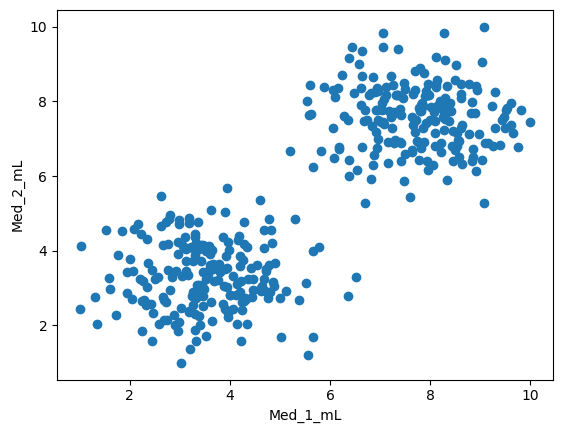

In [4]:
plt.plot(df["Med_2_mL"],df["Med_1_mL"],'o')
plt.xlabel('Med_1_mL')
plt.ylabel('Med_2_mL')
plt.show()

In [5]:
X=df['Med_1_mL']
y=df['Med_2_mL']

In [6]:
X = X.values.reshape(-1, 1)  
y = y.values.reshape(-1, 1) 
print(X.shape)

(400, 1)


In [7]:
# polynomial_converter = PolynomialFeatures(degree=17,include_bias=True)

##### Le convertisseur s'adapte aux données, dans ce cas, il lit chaque colonne X. Puis il "transforme" et sort les nouvelles données polynomiales.Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.
##### reshape(1, -1) if it contains a single sample.

In [8]:
# X=X.values.reshape(-1, 1)

##### Le convertisseur s'adapte aux données, dans ce cas, il lit chaque colonne X. Puis il "transforme" et sort les nouvelles données polynomiales.

In [9]:
# poly_features = polynomial_converter.fit_transform(X) 

In [10]:
# poly_features.shape

In [11]:
# X[0]

In [12]:
# poly_features[0]

In [13]:
# plt.plot(y,X,'o')
# plt.xlabel('Med1')
# plt.ylabel('Med2')
# plt.show()

In [14]:
X.shape

(400, 1)

In [15]:
# X[0]

In [16]:
# poly_features[0]

##### Spliting the data , random_state: 
###### https://stackoverflow.com/questions/28064634/random-state-pseudo-random-number-in-scikit-learn

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape

(320, 1)

In [18]:
# Define maximum polynomial degree
max_degree = 20

# Initialize lists to store BIC values and models
bic_values = []
models = []

# Loop over polynomial degrees
for degree in range(1, max_degree+1):
    # Create polynomial features
    poly_features = PolynomialFeatures(degree=degree)
    X_train_poly = poly_features.fit_transform(X_train)
    
    # Fit polynomial regression model
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    
    # Compute number of parameters
    num_params = X_train_poly.shape[1]
    
    # Compute log-likelihood
    y_train_pred = model.predict(X_train_poly)
    log_likelihood = -0.5 * len(X_train) * np.log(mean_squared_error(y_train, y_train_pred))
    
    # Compute BIC
    bic = -2 * log_likelihood + num_params * np.log(len(X_train))
    
    # Append BIC value and model
    bic_values.append(bic)
    models.append(model)

# Find index of model with lowest BIC
best_model_idx = np.argmin(bic_values)
best_model = models[best_model_idx]
best_degree = best_model_idx + 1

print(f"Best polynomial degree: {best_degree}")



Best polynomial degree: 9


In [19]:
model = LinearRegression(fit_intercept=True)

In [20]:
model.fit(X_train,y_train)

LinearRegression()

In [21]:
test_predictions = model.predict(X_test)
train_predictions = model.predict(X_train)
predictions=model.predict(poly_features)

ValueError: Expected 2D array, got scalar array instead:
array=PolynomialFeatures(degree=20).
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

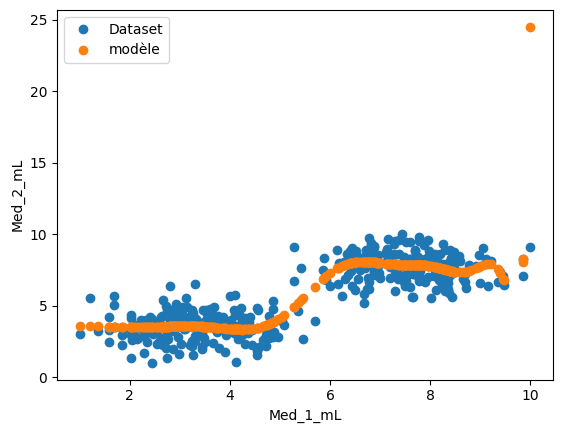

In [ ]:
plt.plot(df['Med_1_mL'], df['Med_2_mL'],'o', label='Dataset')
plt.plot(df['Med_1_mL'], predictions,'o', label='modèle')
plt.xlabel('Med_1_mL')
plt.ylabel('Med_2_mL')
plt.legend()
plt.show()

In [ ]:
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)
print('MAE:', MAE)
print('MSE:', MSE)
print('RMSE:', RMSE)

NameError: name 'mean_absolute_error' is not defined

In [ ]:
# ERREUR D'ENTRAÎNEMENT PAR DEGRÉ
train_rmse_errors = []
# ERREUR DE TEST PAR DEGRÉ
test_rmse_errors = []

for d in range(1,20):
    
    # CRÉER DATA SET POLY POUR DEGRÉ "d"
    polynomial_converter = PolynomialFeatures(degree=d,include_bias=True)
    poly_features = polynomial_converter.fit_transform(X)
    
    # DIVISER CE NOUVEAU DATA SET POLY
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)
    
    # ENTRAÎNER SUR CE NOUVEAU SET POLY
    model = LinearRegression(fit_intercept=True)
    model.fit(X_train,y_train)
    
    # PRÉDIRE À LA FOIS SUR TRAIN ET SUR TEST
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    # Calcul des erreurs
    
    # Erreurs sur Training Set
    train_RMSE = np.sqrt(mean_squared_error(y_train,train_pred))
    
    # Erreurs sur test Set
    test_RMSE = np.sqrt(mean_squared_error(y_test,test_pred))

    # Ajoutez (append) les erreurs à des listes pour les tracer ultérieurement
    
    train_rmse_errors.append(train_RMSE)
    test_rmse_errors.append(test_RMSE)

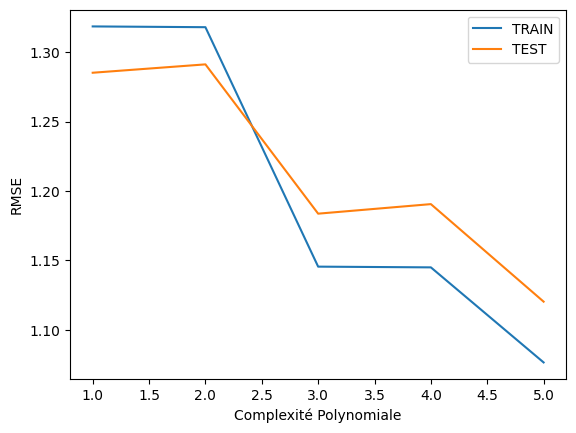

In [ ]:
# Affichage de l'erreur RMSE en fonction du degré du modèle polynomial: de degré 1 à 5
plt.plot(range(1,6),train_rmse_errors[:5],label='TRAIN')
plt.plot(range(1,6),test_rmse_errors[:5],label='TEST')
plt.xlabel("Complexité Polynomiale")
plt.ylabel("RMSE")
plt.legend()

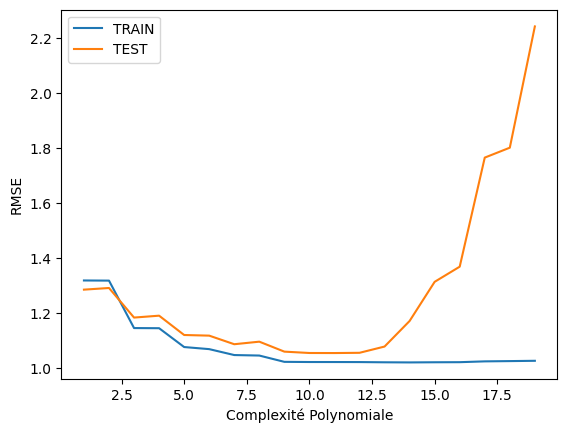

In [ ]:
# Affichage de l'erreur RMSE en fonction du degré du modèle polynomial: de degré 1 à 9
plt.plot(range(1,20),train_rmse_errors,label='TRAIN')
plt.plot(range(1,20),test_rmse_errors,label='TEST')
plt.xlabel("Complexité Polynomiale")
plt.ylabel("RMSE")
plt.legend()

In [ ]:
train_predictions

array([3.49200153, 3.33109867, 7.86094019, 7.88966541, 7.88964022,
       7.27233899, 3.54833092, 7.77325963, 3.52894552, 4.06935521,
       3.54797889, 7.47515747, 3.42398429, 3.53128184, 7.79011962,
       3.5030084 , 3.53287162, 3.5235805 , 3.70027998, 7.91341578,
       7.65719233, 7.34845943, 3.54219173, 7.86178701, 7.92819835,
       7.37582669, 7.61184624, 7.8003931 , 7.98904168, 3.48733445,
       7.85739467, 7.85692419, 3.39599543, 3.56324151, 5.53024537,
       7.47470471, 7.86221651, 7.86201529, 3.56491231, 7.8604124 ,
       8.03222329, 7.71254439, 3.33769423, 8.01912729, 8.02380205,
       3.55717799, 7.45523988, 8.27576309, 7.87037935, 3.33294409,
       7.85113965, 7.76856716, 3.55893392, 3.52253447, 5.19216338,
       3.53049378, 3.49584306, 3.4948162 , 7.72273342, 7.86369343,
       6.77850265, 3.55525936, 3.52963741, 7.74329135, 7.84429919,
       3.53379118, 3.36314188, 3.52987126, 7.3661315 , 7.87651119,
       3.46139105, 7.84376341, 3.49155735, 3.55027353, 7.90121

In [ ]:
test_predictions

array([ 3.37454007,  7.96239918,  3.53933049,  3.54715325,  7.86380665,
        7.53194647,  7.59264616,  8.0766972 ,  3.50952885,  3.49238477,
        3.51581732,  3.48605365,  7.39429025,  7.69460294,  7.97149428,
        3.33417779,  3.46631035,  7.9338374 ,  7.06165259,  3.56258313,
        3.5613646 ,  8.05346922,  7.8652284 ,  3.4065797 ,  3.56417534,
        7.99018132,  3.51788662,  8.06215816,  3.37085084,  7.60071701,
        3.49440316,  7.84981803,  8.06296425,  7.65241024,  7.85470006,
        7.6493626 ,  7.56519722,  3.52885244,  7.88965252,  3.84266251,
        7.86074997,  7.73221022,  7.86632553,  7.53436365,  7.80001073,
        3.53767366,  3.51277271,  3.45301993,  8.07645168,  7.5503737 ,
        7.71724951,  3.56537638,  3.34261304,  7.91399851,  3.49472682,
        3.32999083,  3.56417663,  3.48328485,  3.53027065,  7.86473548,
        8.08603518,  3.49135111,  7.85341161,  3.54097681,  7.82872792,
        3.34291013,  8.00366137,  3.34707851,  3.53001402,  8.02

In [ ]:
r2_test = r2_score(y_test, test_predictions)
r2_train = r2_score(y_train, train_predictions)
print('Train R2:', r2_train)
print('Test R2:', r2_test)

Train R2: 0.8097972560151833
Test R2: 0.4065586381777322


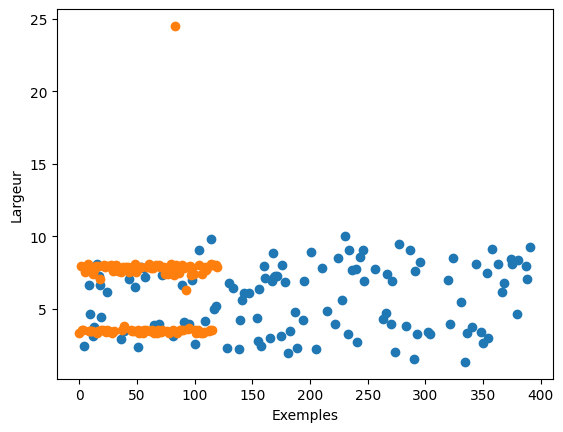

In [ ]:
plt.plot(y_test,'o',label='y_test')
plt.plot(test_predictions,'o', label='y_tes_pred')
plt.xlabel('Exemples')
plt.ylabel('Largeur')
plt.legend
plt.show()